In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

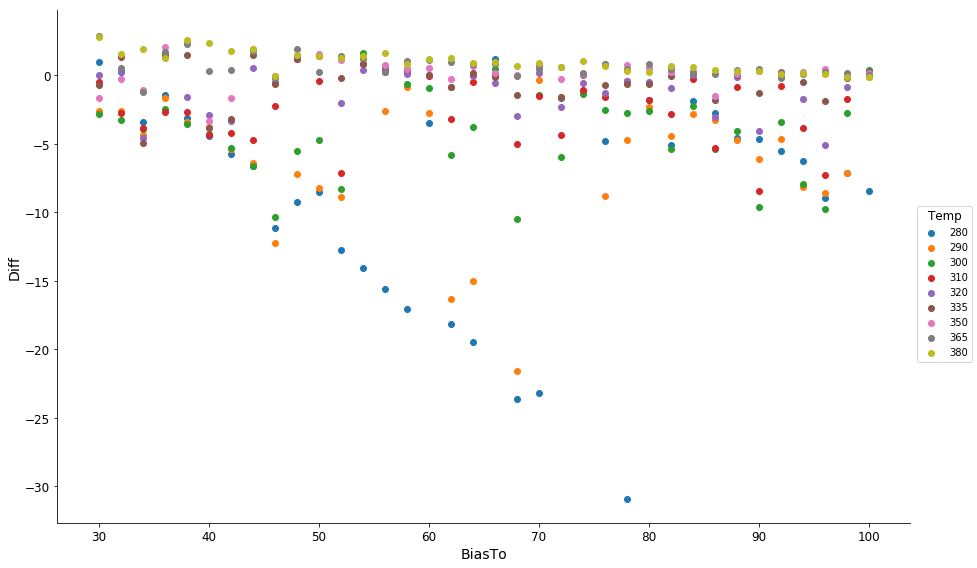

In [204]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_3_18_Apr_220421.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun3 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

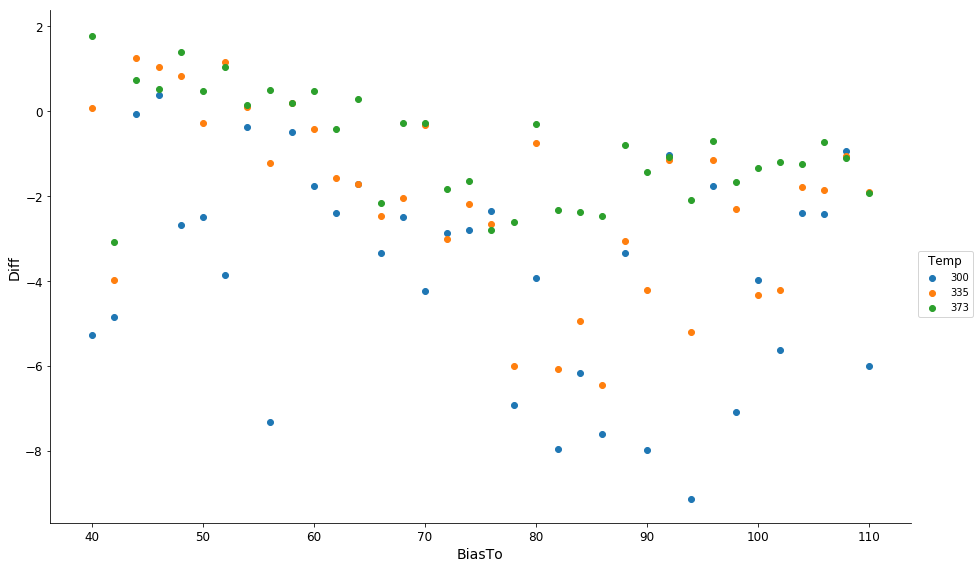

In [36]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_0_05_May_155022.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun0 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

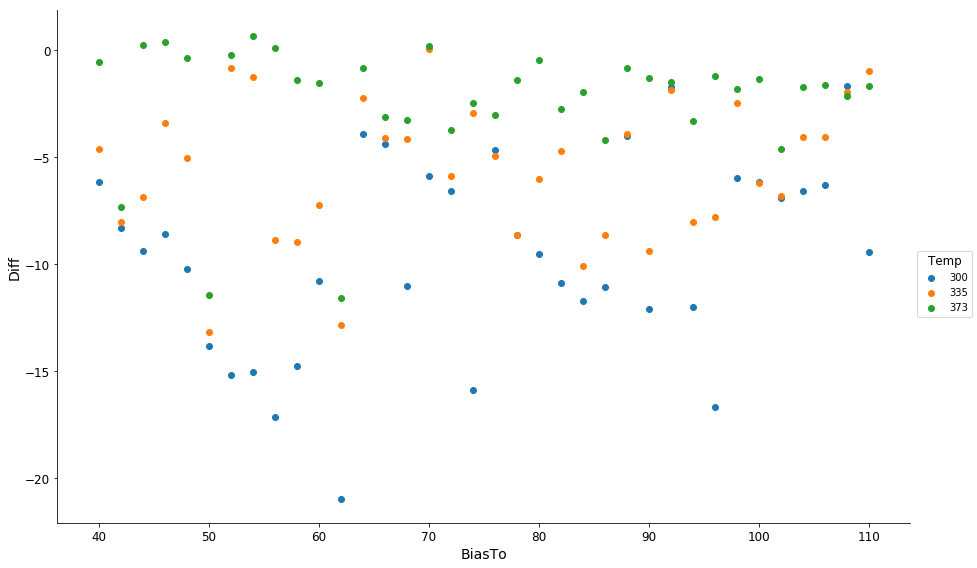

In [5]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/second/rerun_1_05_May_155022.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

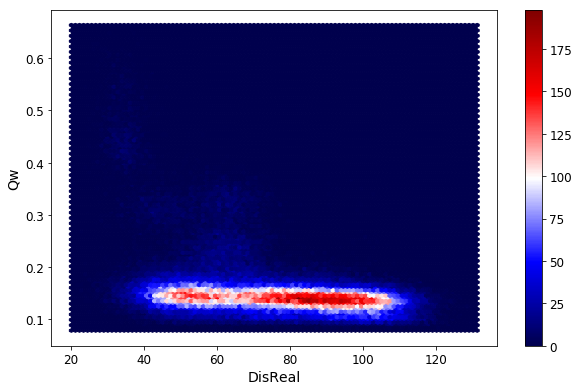

In [11]:
rerun1.query("Temp == 417").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

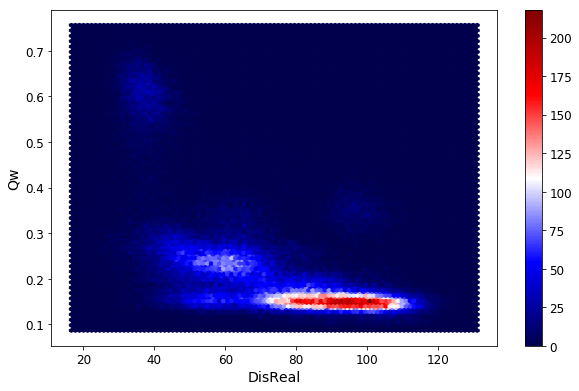

In [12]:
rerun1.query("Temp == 373").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

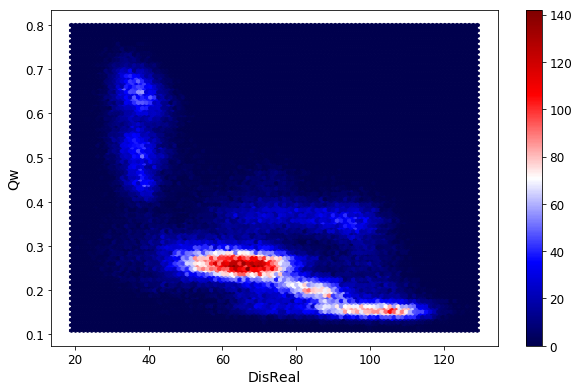

In [179]:
rerun1.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

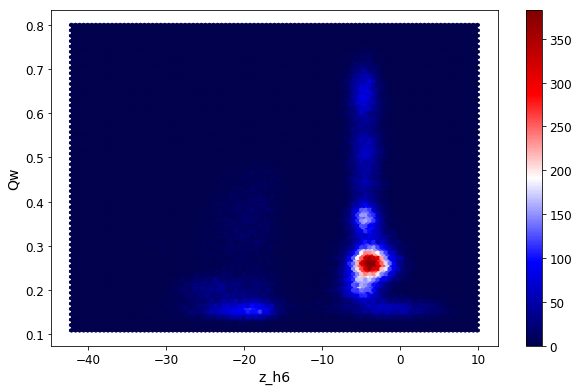

In [203]:
rerun1.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

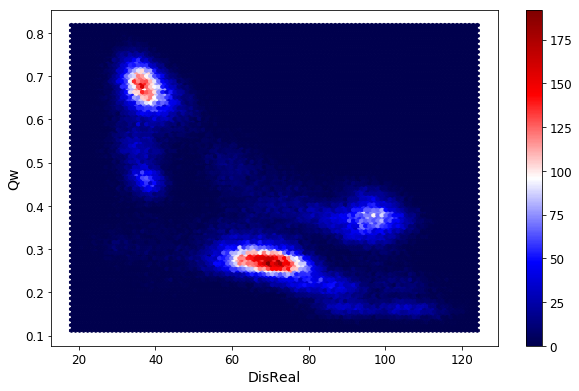

In [6]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [82]:
t = rerun1.query("Temp == 300 and DisReal < 45 and Qw < 0.55")
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
40.0   0     573.0  31.684179  4.559896  18.082627  28.798987  31.413864   
       1     487.0  35.010985  3.939312  25.361349  32.361609  34.799120   
       3     554.0  34.402951  4.334561  24.168642  31.278684  33.904398   
42.0   1     149.0  34.239528  2.716602  26.139341  32.653188  34.411445   
46.0   0     137.0  40.806560  3.310182  29.230923  38.389591  41.898474   
       3     933.0  37.329527  2.726133  29.750523  35.388018  37.302610   
       5     888.0  35.453258  2.976437  20.807314  33.437213  35.554432   
48.0   2    1911.0  37.756046  2.743566  28.040668  35.988553  37.837937   
       6     559.0  37.806057  2.769640  29.423852  36.029382  37.832777   
54.0   4     155.0  38.038134  3.743593  27.455228  35.078298  38.338157   
58.0   0     519.0  40.108739  2.452462  30.250536  38.517247  40.211232   

                  75%        max  
BiasTo Run                        
40.0   0    34.900028  42.865238  
       1    37.479427  44.893315  
       3    37.037829  44.964855  
42.0   1    36.032290  42.219263  
46.0   0    43.400666  44.960475  
       3    39.161815  44.690105  
       5    37.493720  43.104372  
48.0   2    39.645801  44.876064  
       6    39.643835  44.699863  
54.0   4    40.808957  44.982499  
58.0   0    41.700486  44.965996

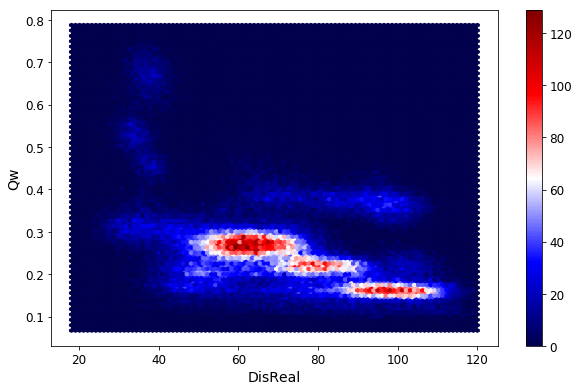

In [75]:
rerun0.query("Temp == 300 and DisReal < 120").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

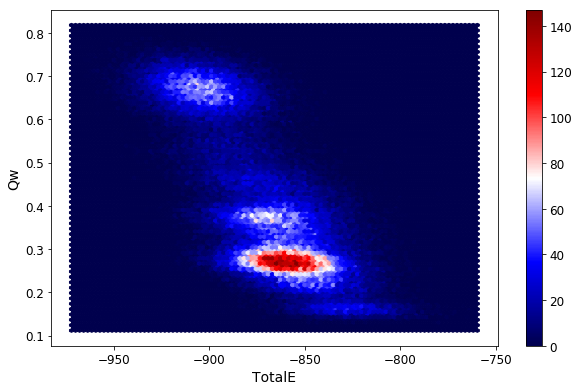

In [7]:
rerun1.query("Temp == 300").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

# Temperature exchange.
Not so good.
Since each trajectory do not experience high and low temperature.
But I guess it is still okish~

In [39]:
all_data = pd.concat([rerun0,rerun1])

In [69]:
tmp = temperature_exchange_table(all_data.query("BiasTo == '92.0'"))
tmp

Temp,300,335,373,417,465,519,579,645,720,803,896,1000
0,1090.0,879.0,349.0,710.0,1672.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,695.0,1525.0,1221.0,781.0,738.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,18.0,63.0,155.0,23.0,1259.0,1755.0,1435.0,184.0,108.0,NaN
3,2344.0,1044.0,790.0,608.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,706.0,1338.0,632.0,686.0,320.0,163.0,1081.0,74.0,NaN,NaN,NaN,NaN
5,404.0,893.0,1053.0,973.0,1111.0,566.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1447.0,1183.0,1329.0,1040.0
7,NaN,6.0,612.0,508.0,304.0,507.0,1591.0,1472.0,NaN,NaN,NaN,NaN
8,416.0,145.0,21.0,231.0,443.0,2703.0,995.0,45.0,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,2735.0,1025.0,1012.0


In [70]:
tmp = temperature_exchange_table(all_data.query("BiasTo == '40.0'"))
tmp

Temp,300,335,373,417,465,519,579,645,720,803,896,1000
0,2488.0,1187.0,1103.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,816.0,1322.0,2102.0,594.0,96.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,66.0,166.0,459.0,497.0,1875.0,1745.0,192.0,NaN,NaN,NaN,NaN
3,1696.0,2101.0,969.0,234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,238.0,1693.0,2255.0,372.0,442.0,NaN,NaN,NaN,NaN,NaN
5,NaN,324.0,422.0,1548.0,1012.0,847.0,47.0,800.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,250.0,442.0,1687.0,2325.0,296.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,698.0,149.0,441.0,3712.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2148.0,1613.0,763.0,476.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0,868.0,1758.0,2030.0


In [57]:
a = all_data.groupby("BiasTo").apply(summarise_temperature_exchange_table)
a.index = a.index.astype("float")

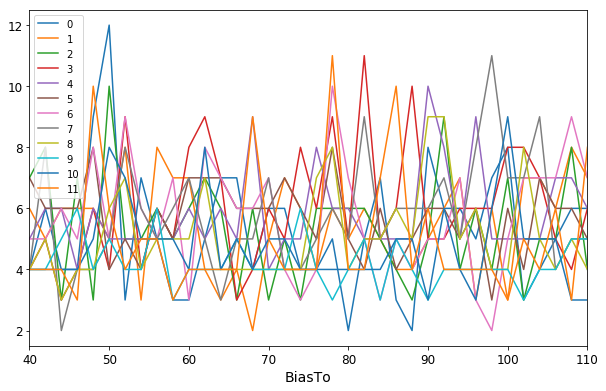

In [68]:
a.sort_index().plot()

In [71]:
a.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,5.305556,5.472222,5.388889,6.055556,5.805556,5.722222,5.750000,5.777778,5.166667,4.222222,4.777778,5.027778
std,2.081475,1.576363,1.777282,1.970416,1.410561,1.161553,1.872737,1.837873,1.539944,0.796819,1.396140,2.090606
min,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
25%,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.500000,5.000000,5.000000,4.000000,4.500000,4.000000
75%,6.250000,7.000000,6.000000,7.250000,6.000000,6.000000,7.000000,7.000000,6.000000,5.000000,5.000000,5.250000
max,12.000000,8.000000,10.000000,11.000000,10.000000,8.000000,10.000000,11.000000,9.000000,6.000000,9.000000,11.000000


## Some small Bias distance didn't have high Q.

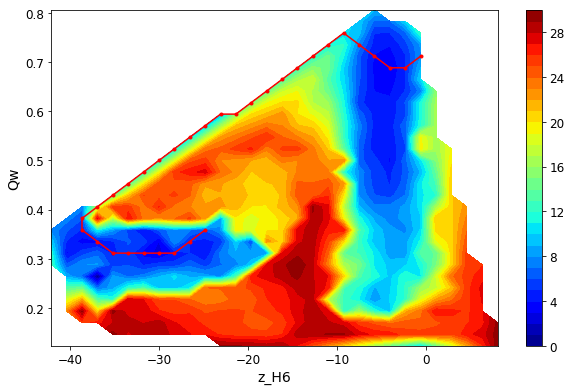

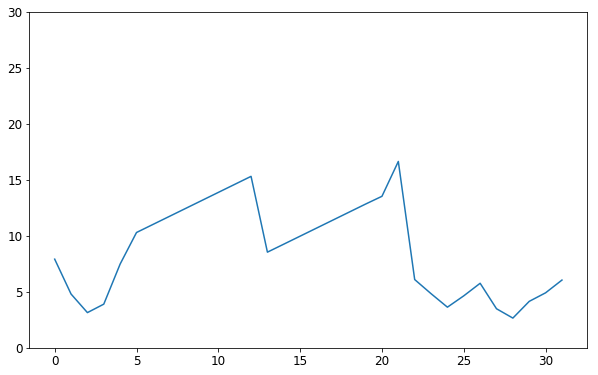

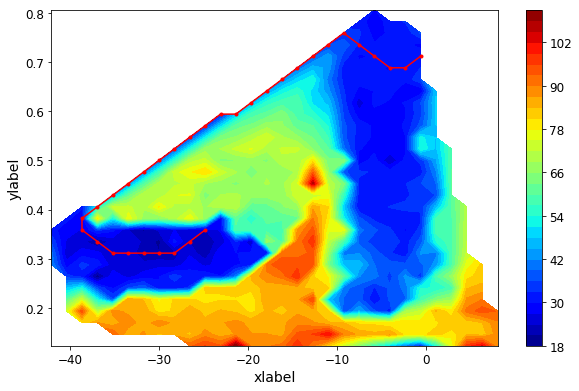

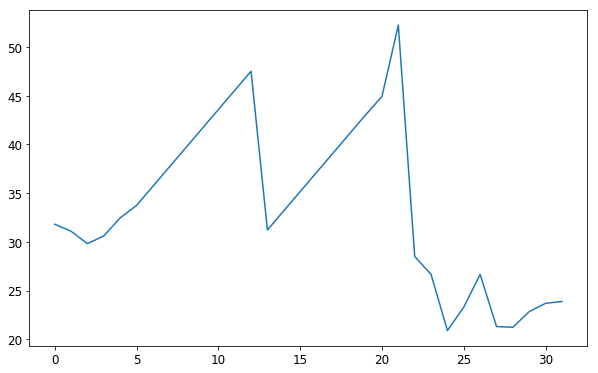

In [83]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 300
location = pre + "/second/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

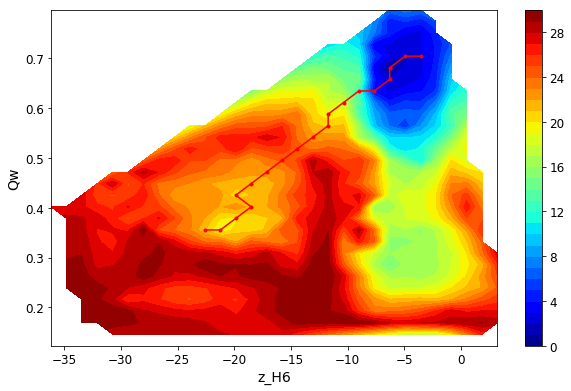

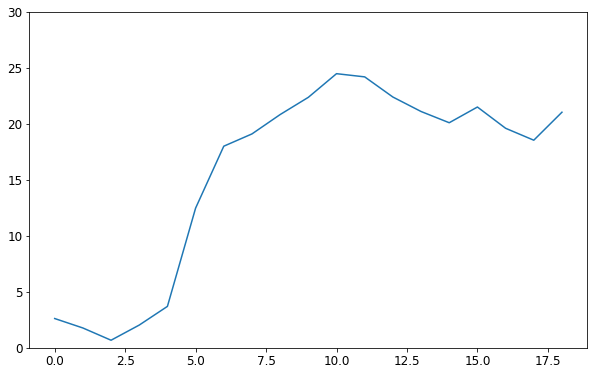

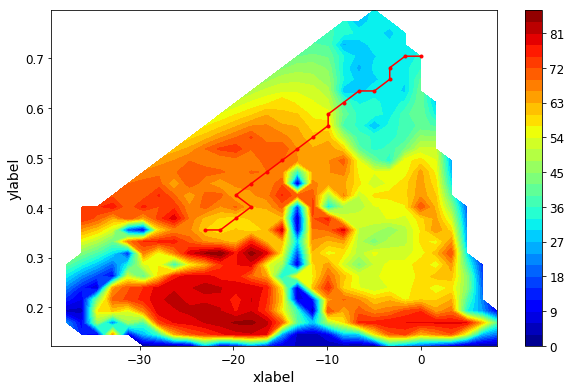

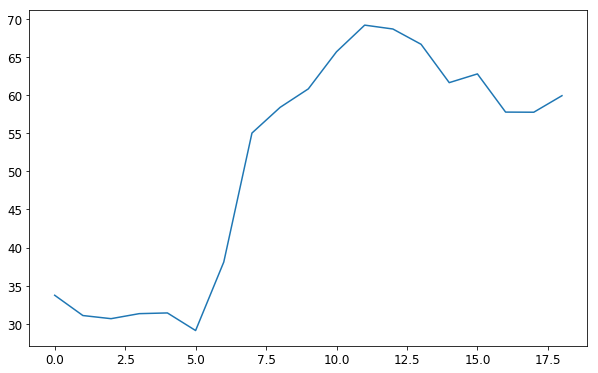

In [88]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 290
location = pre + "/second/_280-350/2d_z_qw/remove_I_know/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [151]:
location = location2
data = np.loadtxt(location)
res = 40
zmin = 0
zmax = 20
xi, yi, zi = getxyz(data, res=res, zmin=zmin, zmax=zmax)
zi = np.where(np.isnan(zi), 20, zi)

In [153]:
def raw_2d_plot(location):
    data = np.loadtxt(location)
    x = data[:,1]
    y = data[:,2]
    z = data[:,3]
    plt.scatter(x,y, c=z, cmap='rainbow')
    # plt.gray()
    plt.colorbar()
    return data

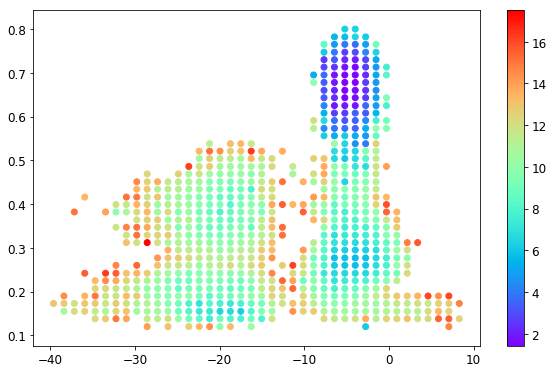

In [155]:
data = raw_2d_plot(location)

In [170]:
data.shape[0]

700

In [180]:
np.ones((res**2, 4))*np.nan

array([[ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan]])

# Assign zmax around for each point if it is empty before.

In [194]:
# construct complete res*res array
tmp = np.ones((res**2, 4))*np.nan
pos = 0
count = 0
x = 1
y = 2
z = 3
xi = np.linspace(min(data[:,x]), max(data[:,x]), res)
yi = np.linspace(min(data[:,y]), max(data[:,y]), res)
for i in range(res):
    for j in range(res):
        tmp[pos,0] = pos
        tmp[pos,1] = xi[i]
        tmp[pos,2] = yi[j]
        if count < data.shape[0] and pos == int(data[count, 0]):
#             tmp[pos,1] = data[count, 1]
#             tmp[pos,2] = data[count, 2]
            tmp[pos,3] = data[count, z]
            count += 1
        pos += 1

# Assign zmax around for each point if it is nan before.
new_tmp = tmp.copy()
pos = 0
count = 0
for i in range(res):
    for j in range(res):
        if not np.isnan(tmp[pos,3]):
            new_tmp[pos] = tmp[pos]
            right_neighbour = i*res + (j+1)
            if j < res-1 and np.isnan(tmp[right_neighbour,3]):
                new_tmp[right_neighbour, 3] = zmax
            left_neighbour = i*res + (j-1)
            if j>0 and np.isnan(tmp[left_neighbour,3]):
                new_tmp[left_neighbour, 3] = zmax
            up_neighbour = (i+1)*res + j
            if i < res-1 and np.isnan(tmp[up_neighbour,3]):
                new_tmp[up_neighbour, 3] = zmax
            down_neighbour = (i-1)*res + j
            if i > 0 and np.isnan(tmp[down_neighbour,3]):
                new_tmp[down_neighbour, 3] = zmax
        pos += 1
tmp = new_tmp[~np.isnan(new_tmp).any(axis=1)]

In [195]:
tmp

array([[  2.00000000e+00,  -3.96280000e+01,   1.54871795e-01,
          2.00000000e+01],
       [  3.00000000e+00,  -3.96280000e+01,   1.72307692e-01,
          1.30470000e+01],
       [  4.00000000e+00,  -3.96280000e+01,   1.89743590e-01,
          2.00000000e+01],
       ..., 
       [  1.56200000e+03,   8.31700000e+00,   1.54871795e-01,
          2.00000000e+01],
       [  1.56300000e+03,   8.31700000e+00,   1.72307692e-01,
          1.47630000e+01],
       [  1.56400000e+03,   8.31700000e+00,   1.89743590e-01,
          2.00000000e+01]])

In [173]:
# fill in those nan with zmax
tmp = np.ones((res**2, 4))*zmax
pos = 0
count = 0
x = 1
y = 2
z = 3
xi = np.linspace(min(data[:,x]), max(data[:,x]), res)
yi = np.linspace(min(data[:,y]), max(data[:,y]), res)
for i in range(res):
    for j in range(res):
        tmp[pos,0] = pos
        tmp[pos,1] = xi[i]
        tmp[pos,2] = yi[j]
        if count < data.shape[0] and pos == int(data[count, 0]):
#             tmp[pos,1] = data[count, 1]
#             tmp[pos,2] = data[count, 2]
            tmp[pos,3] = data[count, z]
            count += 1
        pos += 1

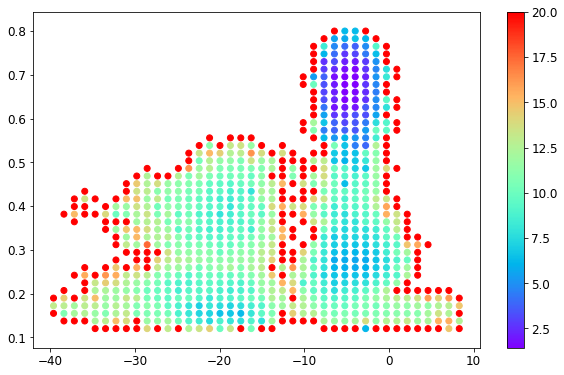

In [196]:
x = tmp[:,1]
y = tmp[:,2]
z = tmp[:,3]
plt.scatter(x,y, c=z, cmap='rainbow')
# plt.gray()
plt.colorbar()

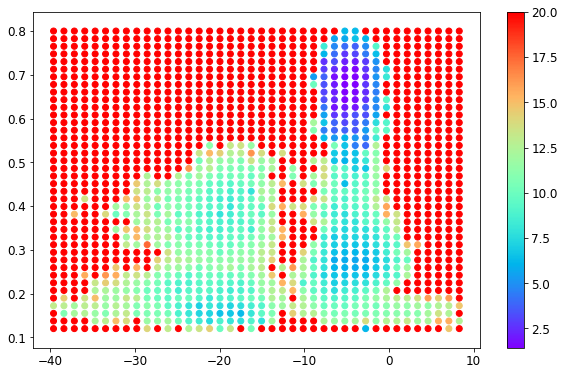

In [174]:
x = tmp[:,1]
y = tmp[:,2]
z = tmp[:,3]
plt.scatter(x,y, c=z, cmap='rainbow')
# plt.gray()
plt.colorbar()

In [ ]:
# fill in those nan with zmax
tmp = np.ones((res**2, 4)) *zmax
count = 0
for i in range(res*res):
    tmp[i,0] = i
    if i == data[count, 1]:
        tmp[i,1] = data[count, 1]
        tmp[i,2] = data[count, 2]
        tmp[i,3] = data[count, 3]

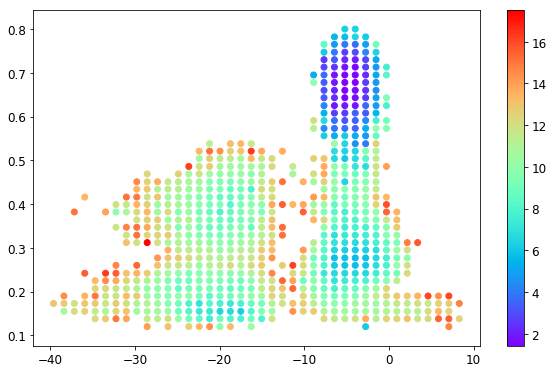

In [148]:
plt.scatter(x,y, c=z, cmap='rainbow')
# plt.gray()
plt.colorbar()

IndexError: index 30 is out of bounds for axis 1 with size 30

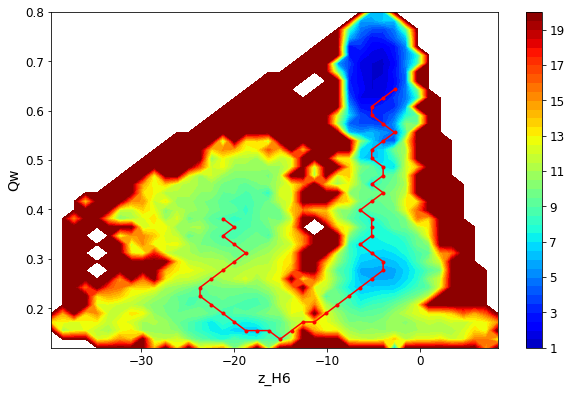

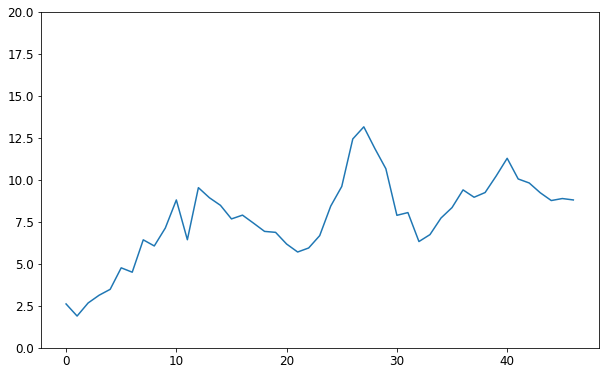

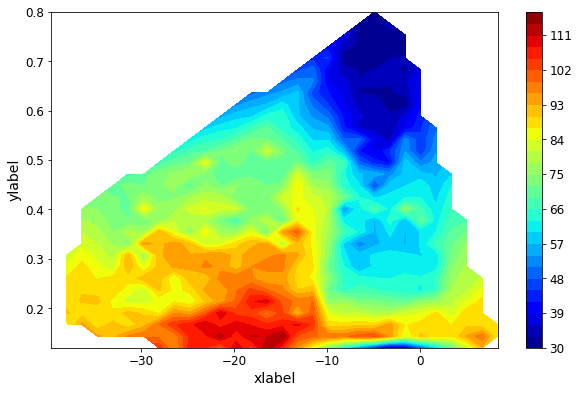

In [197]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1_more_bins/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(15, 15), end=(30,30),save=False, xlabel="z_H6", ylabel="Qw", zmax=20,res=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

IndexError: index 30 is out of bounds for axis 1 with size 30

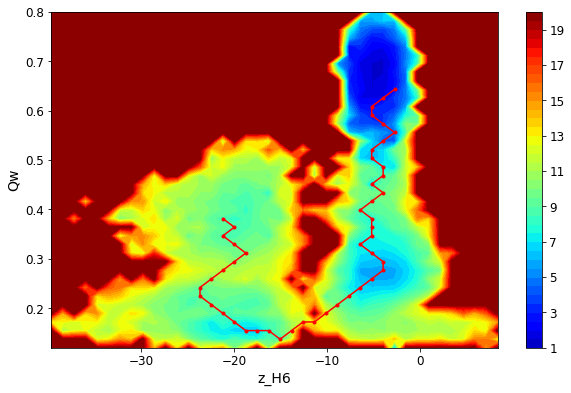

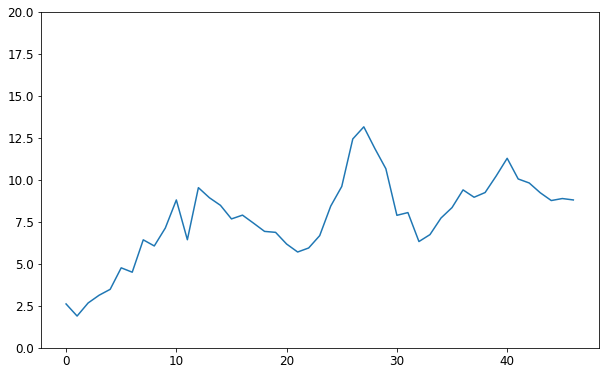

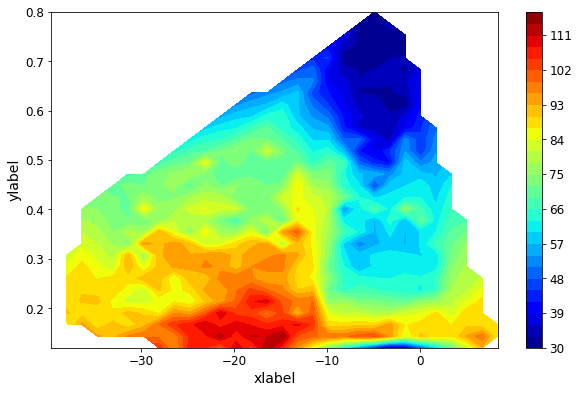

In [178]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1_more_bins/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(15, 15), end=(30,30),save=False, xlabel="z_H6", ylabel="Qw", zmax=20,res=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

IndexError: index 30 is out of bounds for axis 1 with size 30

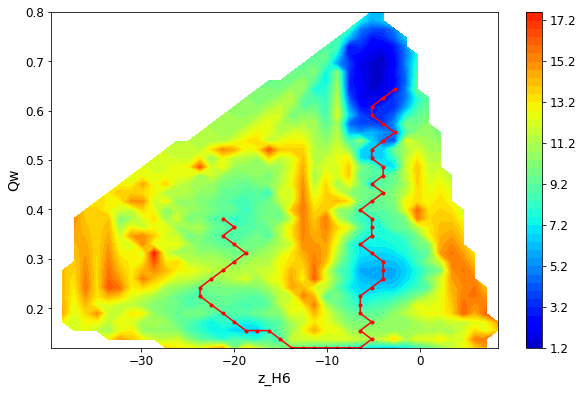

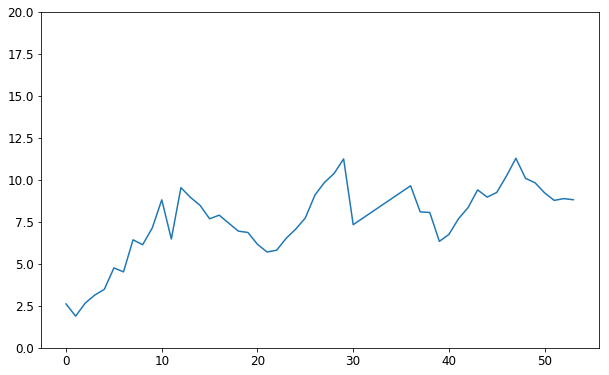

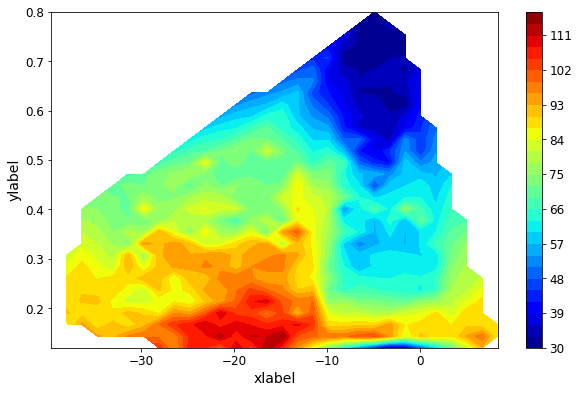

In [133]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1_more_bins/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(15, 15), end=(30,30),save=False, xlabel="z_H6", ylabel="Qw", zmax=20,res=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

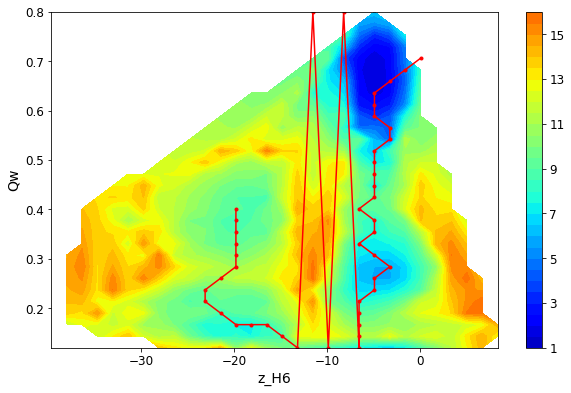

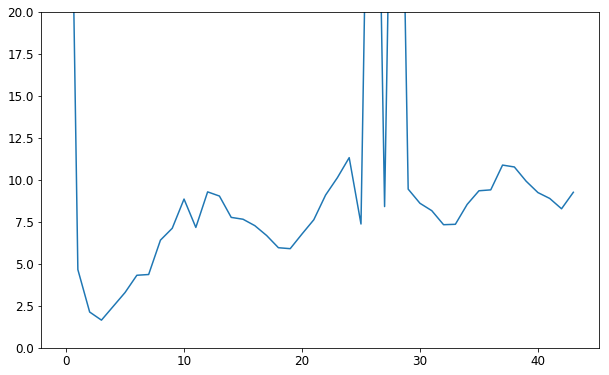

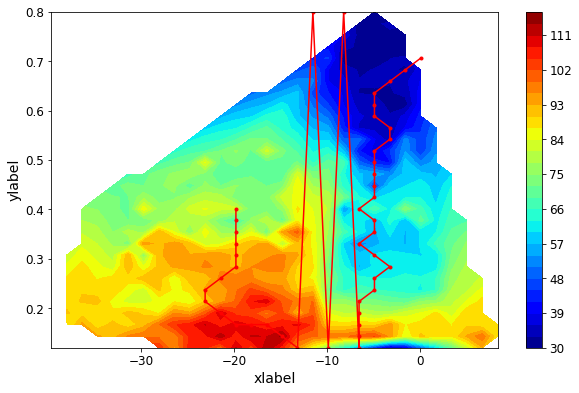

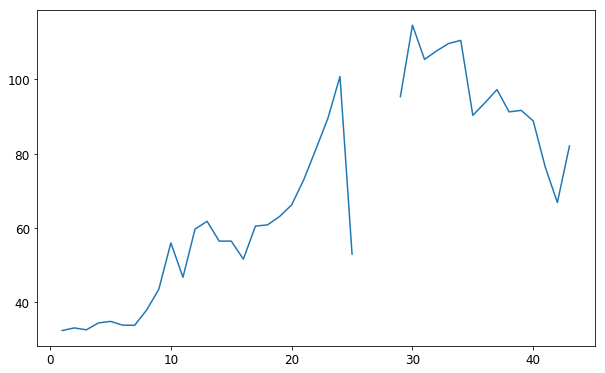

In [110]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1_more_bins/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(12, 12), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

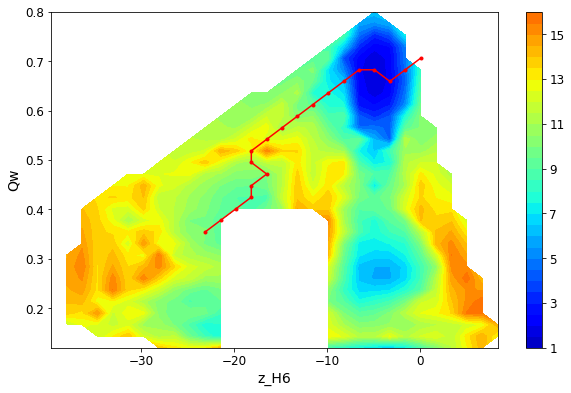

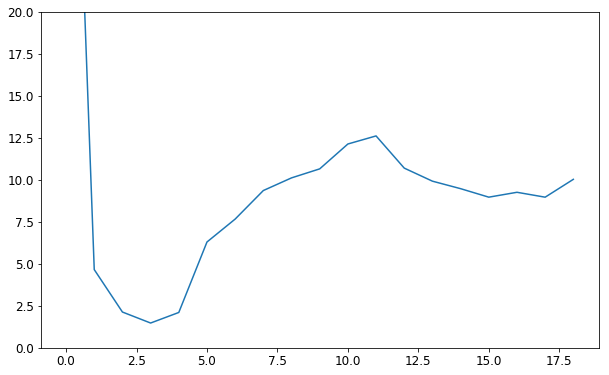

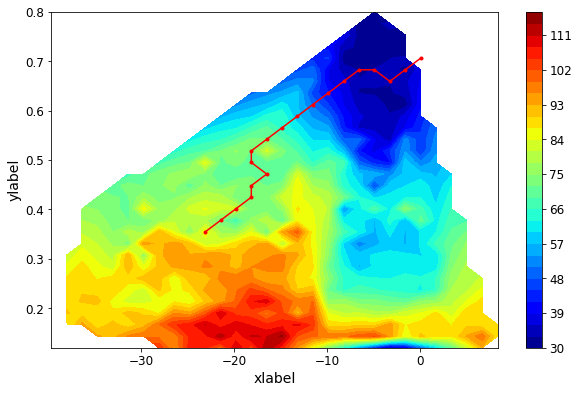

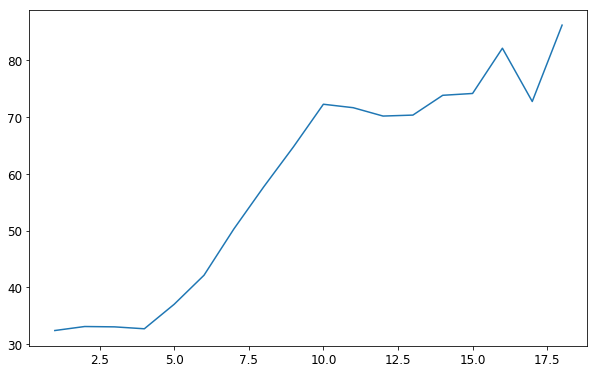

In [106]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1_more_bins/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),block=(-20,-10,0.1,0.4),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

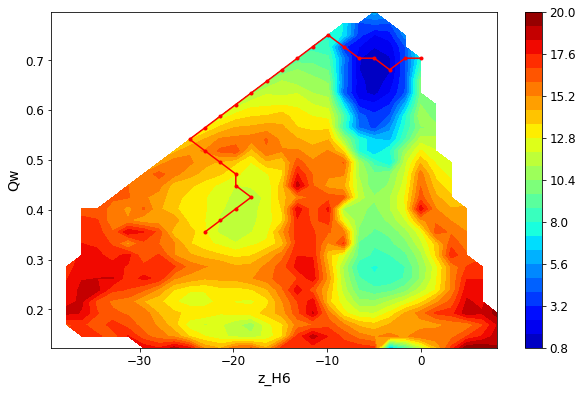

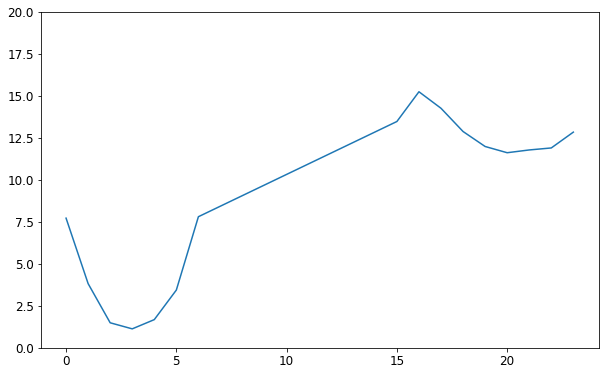

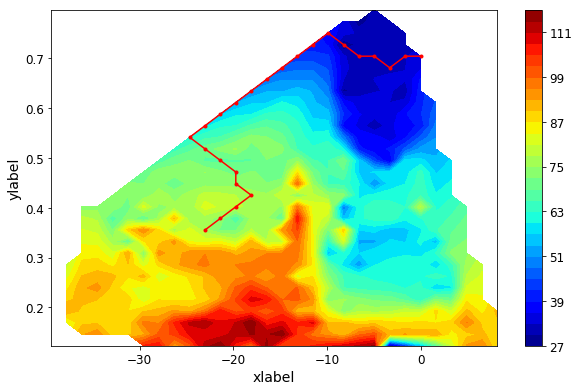

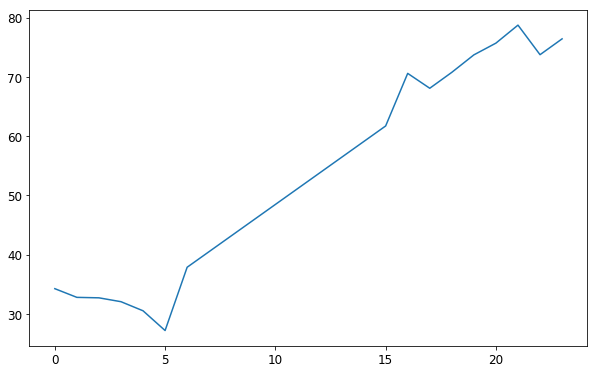

In [104]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 300
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

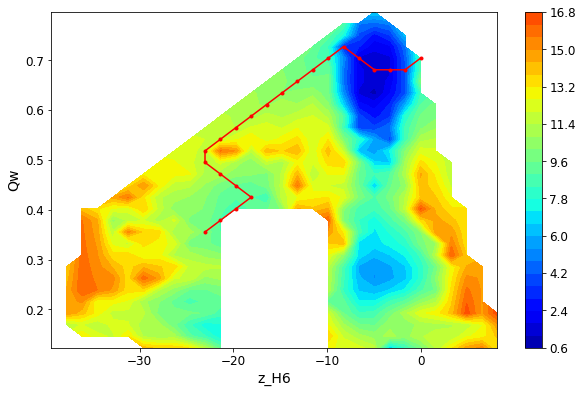

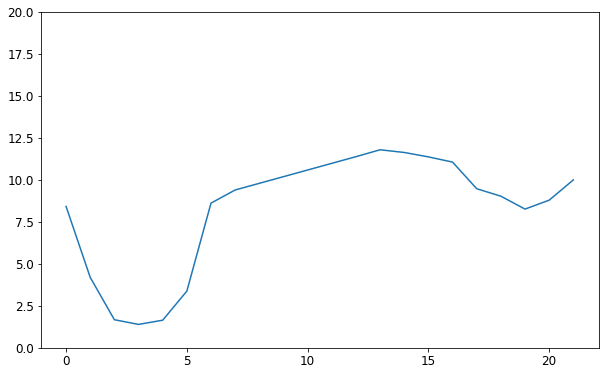

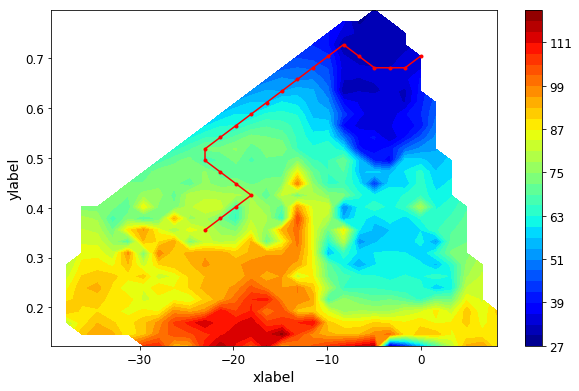

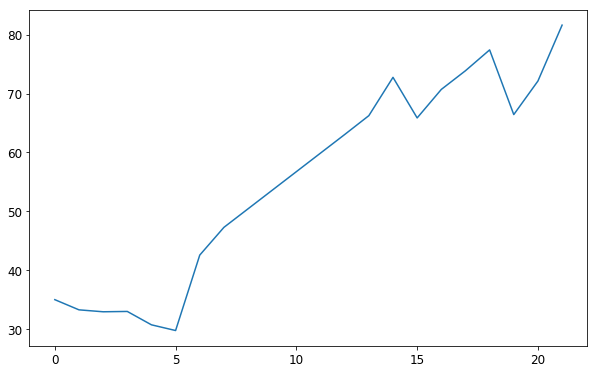

In [96]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),block=(-20,-10,0.1,0.4),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [199]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 310
location = pre + "/second/_280-350/2d_z_qw/remove_I_know_force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(25,24),block=(-20,-10,0.1,0.4),save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server/may_2018/01_week/second/_280-350/2d_z_qw/remove_I_know_force_0.1/pmf-320.dat'